In [2]:
from kafka import KafkaConsumer
import json 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display 

In [3]:
consumer = KafkaConsumer(
    bootstrap_servers='localhost:9092',
    value_deserializer = lambda v: json.loads(v.decode('ascii')),
    auto_offset_reset='earliest'
)

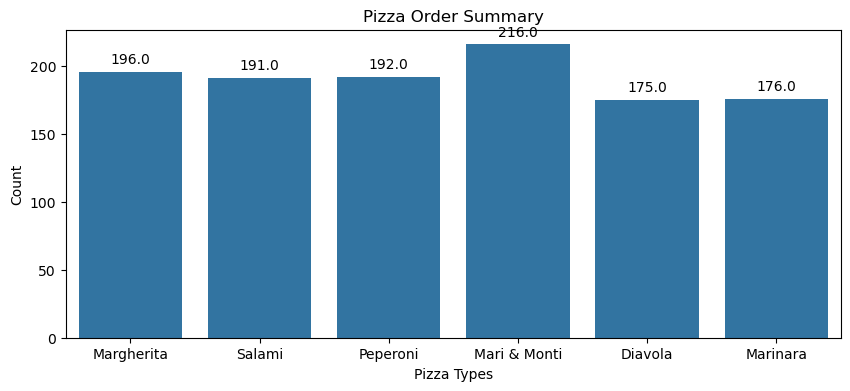

In [ ]:
pz = []
consumer.subscribe(topics=['PizzaOrder'])

for message in consumer:
    plt.figure(figsize = (10, 4))
    plt.title('Pizza Order Summary')
    plt.xlabel('Pizza Types')
    plt.ylabel('Count')
   
    v = message.value                    # message.partition, message.offset
    pz.append(v["pizzas"][0]["pizzaName"])
    pzCount = {m:pz.count(m) for m in pz}
    x = list(pzCount.keys())
    y = list(pzCount.values())
   
    barplt=sns.barplot(x=x, y=y)
    for p in barplt.patches:
        barplt.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')
    plt.show()
    display.clear_output(wait=True)